In [221]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

In [222]:
urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [223]:
pgs_2016 = 154
pgs_2017 = 147
pgs_2018 = 85
pgs_2019 = 113

pgs_half_2016 = 898
pgs_half_2017 = 892
pgs_half_2018 = 598
pgs_half_2019 = 690

In [224]:
def marathon(url, pages):
    final_list = []
    df = pd.DataFrame()
    for p in range(1, pages + 1): # pages + 1 because range stops at the last number
        response = requests.post(url + str(p)) # Goes to URL and adds p to end of it to select page.
        soup = BeautifulSoup(response.content, 'lxml')
        tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
        result_list = pd.read_html(str(tables[0]))
        final_list = result_list[0]
        df = df.append(final_list, ignore_index = True)
    return df


In [225]:
full_2016 = marathon(urlbase_2016, pgs_2016)
full_2016.shape

(3842, 4)

In [226]:
full_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3842 non-null   int64 
 1   Bib      3842 non-null   int64 
 2   Name     3842 non-null   object
 3   Time     3842 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.2+ KB


In [227]:
full_2016.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28


converting object type time column into date time type 

In [228]:
full_2016["Time"]= pd.to_datetime(full_2016["Time"])

In [229]:
full_2016.dtypes

Overall             int64
Bib                 int64
Name               object
Time       datetime64[ns]
dtype: object

convert mapping 60 minutes into 100th- it was hard to plot date time  type - to float

In [239]:
full_2016['durationFloat'] =full_2016['Time'].dt.hour.astype(float) + round(full_2016['Time'].dt.minute/60, 2)

In [240]:
full_2016.head()

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,2020-11-22 02:25:42,2.42
1,2,3,Brian Shelton,2020-11-22 02:34:43,2.57
2,3,1047,Christopher Capps,2020-11-22 02:38:43,2.63
3,4,1052,Jason Grimes,2020-11-22 02:45:06,2.75
4,5,1046,David Adams,2020-11-22 02:47:28,2.78


In [244]:
full_2016.describe()

,Overall,Bib,durationFloat
count,3842.000000,3842.000000,3842.000000
mean,24301.906559,15431.385216,3.712980
std,41576.036228,8600.621622,2.123165
min,1.000000,1.000000,0.000000
25%,963.250000,7298.250000,3.420000
50%,1925.500000,16104.500000,4.430000
75%,2889.750000,24009.750000,5.170000
max,99999.000000,45340.000000,7.000000


In [230]:
full_2016['Time'].dt.hour.astype(float)

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3837    0.0
3838    0.0
3839    0.0
3840    0.0
3841    0.0
Name: Time, Length: 3842, dtype: float64

In [233]:
 round(full_2016['Time'].dt.minute/60,2)

0       0.42
1       0.57
2       0.63
3       0.75
4       0.78
        ... 
3837    0.00
3838    0.00
3839    0.00
3840    0.00
3841    0.00
Name: Time, Length: 3842, dtype: float64

finding all the minimum values (0's)

In [245]:
slowest = full_2016.loc[full_2016["durationFloat"] == full_2016["durationFloat"].min()]

In [246]:
slowest

,Overall,Bib,Name,Time,durationFloat
2952,99999,27326,Ashley Newton,2020-11-22,0.0
2953,99999,2031,Thomas Sirna,2020-11-22,0.0
2954,99999,4027,Sulaiman Seriki,2020-11-22,0.0
2955,99999,17252,Carol Mulderink,2020-11-22,0.0
2956,99999,27291,Mark Warf,2020-11-22,0.0
...,...,...,...,...,...
3837,99999,21159,Beth Lyons,2020-11-22,0.0
3838,99999,25061,Aleksei Stevens,2020-11-22,0.0
3839,99999,6047,Lizzie Ziccardi,2020-11-22,0.0
3840,99999,2052,Adam Pastors,2020-11-22,0.0


In [247]:
full_2016.dtypes

Overall                   int64
Bib                       int64
Name                     object
Time             datetime64[ns]
durationFloat           float64
dtype: object

eliminated the 0 values and saved it inside the new table-assuming the people did not run

In [248]:
final_2016_full = full_2016.drop(slowest.index)

In [249]:
winner = final_2016_full.loc[final_2016_full["Time"]==final_2016_full["Time"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
3390,99999,4109,Bruce Kesselring,2020-11-22 02:24:09,2.4


In [251]:
full_2016["durationFloat"].max()

7.0

In [252]:
import seaborn as sns

making a scatter plot to determine any corelations 

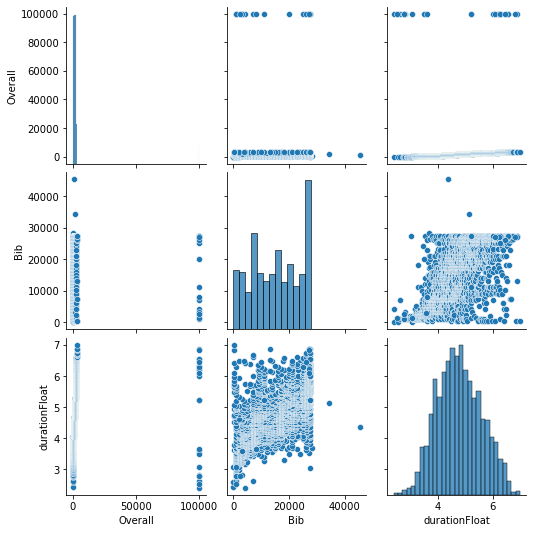

In [253]:
sns.pairplot(final_2016_full)

to see any corelation between Bib and DurationFloat

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='durationFloat'>

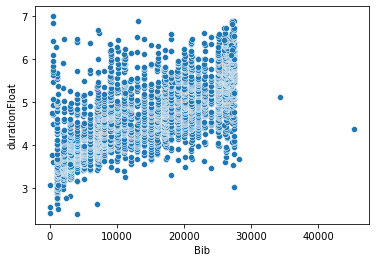

In [256]:
sns.scatterplot("Bib","durationFloat",data=final_2016_full)

this contains all the people who didnt run and the duration was zero

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

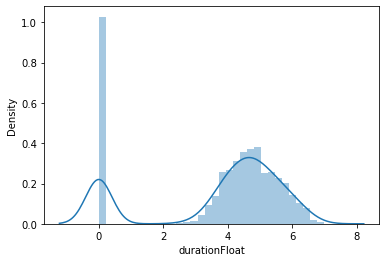

In [259]:
sns.distplot(full_2016["durationFloat"])

after droppping th zero duration 

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

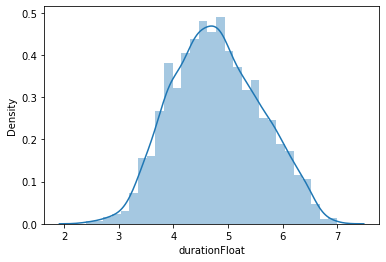

In [260]:
sns.distplot(final_2016_full["durationFloat"])

In [261]:
final_2016_full.describe()

,Overall,Bib,durationFloat
count,2978.000000,2978.000000,2978.000000
mean,2340.090329,15304.475151,4.790218
std,9206.123668,8531.566665,0.808810
min,1.000000,1.000000,2.400000
25%,747.250000,7297.250000,4.200000
50%,1492.500000,16069.500000,4.750000
75%,2239.750000,23058.750000,5.370000
max,99999.000000,45340.000000,7.000000


<AxesSubplot:xlabel='durationFloat'>

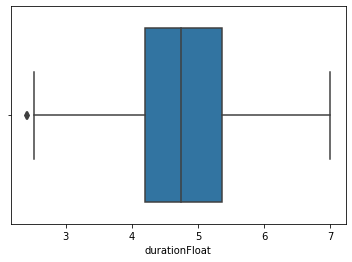

In [262]:
sns.boxplot(x="durationFloat",data=final_2016_full)

unfiltered data- data represents a lot of outliers including the people who did run

<AxesSubplot:xlabel='durationFloat'>

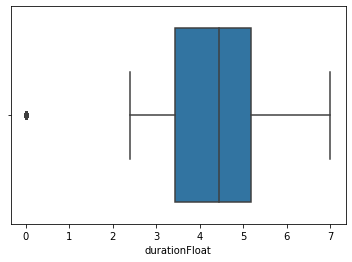

In [263]:
sns.boxplot(x="durationFloat",data=full_2016)

In [192]:
# How many people lie in each bib
final_2016_full.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
3,1,1,1
101,1,1,1
402,1,1,1
404,1,1,1
...,...,...,...
27453,1,1,1
27454,1,1,1
28142,1,1,1


In [195]:
## 2017 FULL-MARATHON

In [27]:

full_2017 = marathon(urlbase_2017, pgs_2017)
full_2017.shape

(3651, 4)

In [22]:
full_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3651 non-null   int64 
 1   Bib      3651 non-null   int64 
 2   Name     3651 non-null   object
 3   Time     3651 non-null   object
dtypes: int64(2), object(2)
memory usage: 114.2+ KB


In [23]:
full_2017.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53


In [28]:
slowest = full_2016.loc[full_2016["Time"] == full_2016["Time"].min()]

In [29]:
slowest

,Overall,Bib,Name,Time
2952,99999,27326,Ashley Newton,00:00:00
2953,99999,2031,Thomas Sirna,00:00:00
2954,99999,4027,Sulaiman Seriki,00:00:00
2955,99999,17252,Carol Mulderink,00:00:00
2956,99999,27291,Mark Warf,00:00:00
...,...,...,...,...
3837,99999,21159,Beth Lyons,00:00:00
3838,99999,25061,Aleksei Stevens,00:00:00
3839,99999,6047,Lizzie Ziccardi,00:00:00
3840,99999,2052,Adam Pastors,00:00:00


In [30]:
final_2017_full = full_2017.drop(slowest.index)

KeyError: '[3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664\n 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678\n 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692\n 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706\n 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720\n 3721 3722 3723 3724 3725 3727 3728 3729 3730 3731 3732 3733 3734 3735\n 3736 3737 3738 3739 3740 3742 3743 3744 3745 3746 3747 3748 3749 3750\n 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760 3761 3763 3764 3765\n 3766 3767 3768 3769 3770 3771 3772 3773 3774 3775 3776 3777 3778 3779\n 3780 3781 3782 3783 3784 3785 3786 3787 3788 3789 3790 3791 3792 3793\n 3794 3795 3796 3797 3798 3799 3800 3801 3802 3803 3804 3805 3806 3807\n 3808 3809 3810 3811 3812 3813 3814 3815 3816 3817 3818 3819 3820 3821\n 3822 3823 3824 3825 3826 3827 3828 3829 3830 3832 3833 3834 3835 3836\n 3837 3838 3839 3840 3841] not found in axis'

In [33]:
final_2017_full = full_2017.drop(slowest.index)

KeyError: '[3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664\n 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678\n 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692\n 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706\n 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720\n 3721 3722 3723 3724 3725 3727 3728 3729 3730 3731 3732 3733 3734 3735\n 3736 3737 3738 3739 3740 3742 3743 3744 3745 3746 3747 3748 3749 3750\n 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760 3761 3763 3764 3765\n 3766 3767 3768 3769 3770 3771 3772 3773 3774 3775 3776 3777 3778 3779\n 3780 3781 3782 3783 3784 3785 3786 3787 3788 3789 3790 3791 3792 3793\n 3794 3795 3796 3797 3798 3799 3800 3801 3802 3803 3804 3805 3806 3807\n 3808 3809 3810 3811 3812 3813 3814 3815 3816 3817 3818 3819 3820 3821\n 3822 3823 3824 3825 3826 3827 3828 3829 3830 3832 3833 3834 3835 3836\n 3837 3838 3839 3840 3841] not found in axis'

In [34]:
winner = final_2017_full.loc[final_2017_full["Time"]==final_2017_full["Time"].min()]
winner

NameError: name 'final_2017_full' is not defined

In [35]:
full_2017["Time"].max()

'06:38:19'

In [36]:
import seaborn as sns

In [37]:
sns.pairplot(final_2017_full)

NameError: name 'final_2017_full' is not defined

In [ ]:
sns.scatterplot("Bib","Time",data=final_2017_full)

In [ ]:
final_2017_full['durationFloat'] = final_2017_full['Time'].dt.hour.astype(float) + round(final_2017_full['Time'].dt.min/60, 2)

In [ ]:
sns.scatterplot("Time","Overall",data=final_2017_full)

In [ ]:
sns.scatterplot("Overall","Bib",data=final_2017_full)

In [ ]:
# How many people lie in each bib
final_2017_full.groupby("Bib").count()

In [ ]:
final_2017_full.loc[final_2017_full["Bib"] == 1]

In [ ]:
final_2017_full['Time'].var()

In [ ]:
## 2018 FULL-MARATHON

In [38]:
full_2018 = marathon(urlbase_2018, pgs_2018)
full_2018.shape

(2115, 4)

In [39]:
full_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2115 non-null   int64 
 1   Bib      2115 non-null   int64 
 2   Name     2115 non-null   object
 3   Time     2115 non-null   object
dtypes: int64(2), object(2)
memory usage: 66.2+ KB


In [40]:
full_2018["Time"]= pd.to_datetime(full_2018["Time"]) 

In [42]:
full_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  2115 non-null   int64         
 1   Bib      2115 non-null   int64         
 2   Name     2115 non-null   object        
 3   Time     2115 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 66.2+ KB


In [43]:
full_2018.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,2020-11-22 02:28:16
1,2,3,Garang Madut,2020-11-22 02:29:52
2,3,33442,Kevin Fink,2020-11-22 02:38:59
3,4,33441,Andrew Hodges,2020-11-22 02:43:59
4,5,30028,Nicholas Aubert,2020-11-22 02:48:11


In [50]:
slowest = full_2018.loc[full_2018["Time"] == full_2018["Time"].min()]

In [51]:
full_2018.tail()

,Overall,Bib,Name,Time
2110,99999,33654,Jeff Ekkart,2020-11-22
2111,99999,31170,Austin Perkins,2020-11-22
2112,99999,30482,David Ramos,2020-11-22
2113,99999,33461,Emily Eagerton,2020-11-22
2114,99999,31515,Tony Quernemoen,2020-11-22


In [53]:
final_2018_full = full_2018.drop(slowest.index)

In [54]:
winner = final_2018_full.loc[final_2018_full["Time"]==final_2018_full["Time"].min()]
winner

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,2020-11-22 02:28:16


In [55]:
full_2018["Time"].max()

Timestamp('2020-11-22 06:54:09')

In [ ]:
import seaborn as sns

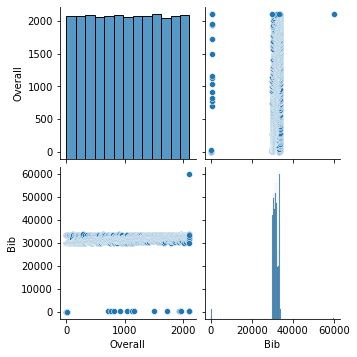

In [56]:
sns.pairplot(final_2018_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='Time'>

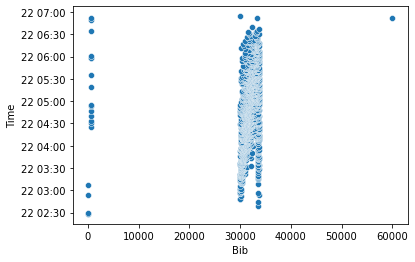

In [57]:
sns.scatterplot("Bib","Time",data=final_2018_full)

In [58]:
final_2018_full["Time"] = final_2018_full['Time'].dt.time

In [59]:
final_2018_full['durationFloat'] = final_2018_full['Time'].dt.hour.astype(float) + round(final_2018_full['Time'].dt.min/60, 2)

AttributeError: Can only use .dt accessor with datetimelike values

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: float() argument must be a string or a number, not 'datetime.time'

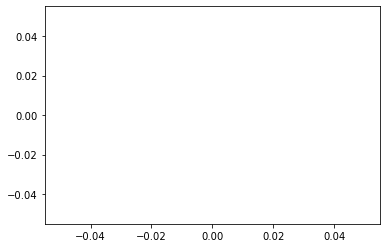

In [60]:
sns.scatterplot("Time","Overall",data=final_2018_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='Bib'>

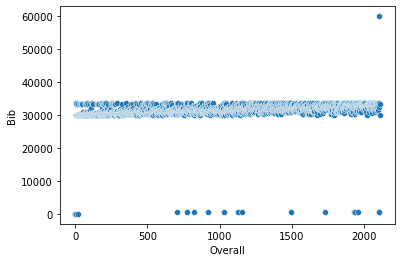

In [61]:
sns.scatterplot("Overall","Bib",data=final_2018_full)

In [62]:
# How many people lie in each bib
final_2018_full.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
3,1,1,1
10,1,1,1
11,1,1,1
517,1,1,1
...,...,...,...
33717,1,1,1
33718,1,1,1
33719,1,1,1


In [63]:
final_2018_full.loc[final_2018_full["Bib"] == 1]

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16


In [64]:
final_2018_full['Time'].var()

TypeError: float() argument must be a string or a number, not 'datetime.time'

In [66]:
full_2019 = marathon(urlbase_2019, pgs_2019)
full_2019.shape

(2811, 4)

In [67]:
full_2019.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2811 non-null   int64 
 1   Bib      2811 non-null   int64 
 2   Name     2811 non-null   object
 3   Time     2811 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.0+ KB


In [68]:
full_2019.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09


In [69]:
full_2019["Time"]= pd.to_datetime(full_2019["Time"]) 

In [70]:
full_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  2811 non-null   int64         
 1   Bib      2811 non-null   int64         
 2   Name     2811 non-null   object        
 3   Time     2811 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 88.0+ KB


In [71]:
full_2019.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,2020-11-22 01:37:54
1,2,1,Scott Wietecha,2020-11-22 02:34:59
2,3,4,Jordan Wilson,2020-11-22 02:35:24
3,4,30034,Steelton Flynn,2020-11-22 02:39:59
4,5,30035,Thomas Ellis,2020-11-22 02:42:09


In [72]:
slowest = full_2019.loc[full_2019["Time"] == full_2019["Time"].min()]

In [73]:
slowest

,Overall,Bib,Name,Time
2025,99999,50463,Pedro Lopez,2020-11-22
2026,99999,30318,Mahlon Hellman,2020-11-22
2027,99999,30334,Jason Kelly,2020-11-22
2028,99999,32317,Rob Bateman,2020-11-22
2029,99999,32340,Michael Cauley,2020-11-22
...,...,...,...,...
2806,99999,31741,Erica Cruz,2020-11-22
2807,99999,32960,Christine Zavala,2020-11-22
2808,99999,31659,Yaa Asare,2020-11-22
2809,99999,32497,Brian Miller,2020-11-22


In [74]:
final_2019_full = full_2019.drop(slowest.index)

In [75]:
winner = final_2019_full.loc[final_2019_full["Time"]==final_2019_full["Time"].min()]
winner

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,2020-11-22 01:37:54


In [76]:
full_2019["Time"].max()

Timestamp('2020-11-22 06:43:55')

In [77]:
import seaborn as sns

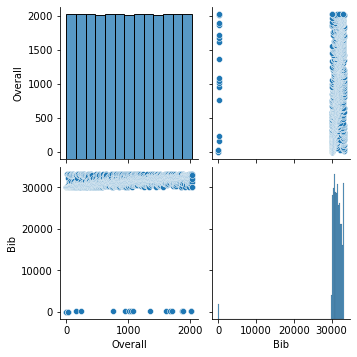

In [78]:
sns.pairplot(final_2019_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='Time'>

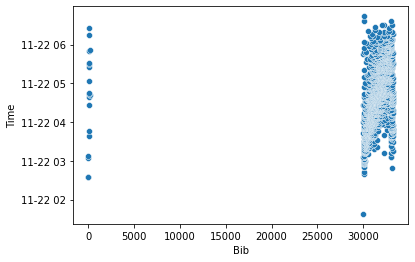

In [79]:
sns.scatterplot("Bib","Time",data=final_2019_full)

In [84]:
final_2019_full["Time"] = final_2019_full['Time'].dt.time

AttributeError: Can only use .dt accessor with datetimelike values

In [85]:
final_2019_full['durationFloat'] = final_2019_full['Time'].dt.hour.astype(float)

AttributeError: Can only use .dt accessor with datetimelike values

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: float() argument must be a string or a number, not 'datetime.time'

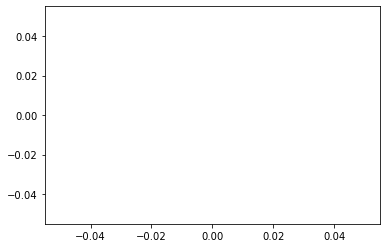

In [83]:
sns.scatterplot("Time","Overall",data=final_2019_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='Bib'>

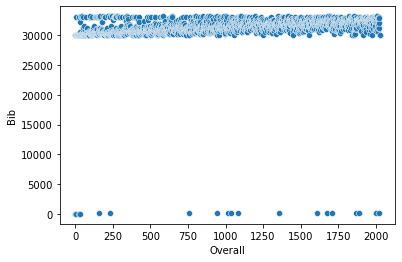

In [86]:
sns.scatterplot("Overall","Bib",data=final_2019_full)

In [87]:
# How many people lie in each bib
final_2019_full.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
2,1,1,1
4,1,1,1
7,1,1,1
101,1,1,1
...,...,...,...
33213,1,1,1
33215,1,1,1
33216,1,1,1


In [88]:
final_2019_full.loc[final_2019_full["Bib"] == 1]

,Overall,Bib,Name,Time
1,2,1,Scott Wietecha,02:34:59


In [89]:
final_2016_full['Time'].var()

TypeError: could not convert string to float: '02:25:42'

In [ ]:
## half_marathon_2016

In [90]:
half_2016 = marathon(urlbase_2016, pgs_2016)
half_2016.shape

(3842, 4)

In [91]:
half_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3842 non-null   int64 
 1   Bib      3842 non-null   int64 
 2   Name     3842 non-null   object
 3   Time     3842 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.2+ KB


In [92]:
half_2016.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28


In [93]:
half_2016["Time"]= pd.to_datetime(half_2016["Time"]) 

In [94]:
half_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  3842 non-null   int64         
 1   Bib      3842 non-null   int64         
 2   Name     3842 non-null   object        
 3   Time     3842 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 120.2+ KB


In [95]:
half_2016.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,2020-11-22 02:25:42
1,2,3,Brian Shelton,2020-11-22 02:34:43
2,3,1047,Christopher Capps,2020-11-22 02:38:43
3,4,1052,Jason Grimes,2020-11-22 02:45:06
4,5,1046,David Adams,2020-11-22 02:47:28


In [96]:
slowest = half_2016.loc[half_2016["Time"] == half_2016["Time"].min()]

In [97]:
slowest

,Overall,Bib,Name,Time
2952,99999,27326,Ashley Newton,2020-11-22
2953,99999,2031,Thomas Sirna,2020-11-22
2954,99999,4027,Sulaiman Seriki,2020-11-22
2955,99999,17252,Carol Mulderink,2020-11-22
2956,99999,27291,Mark Warf,2020-11-22
...,...,...,...,...
3837,99999,21159,Beth Lyons,2020-11-22
3838,99999,25061,Aleksei Stevens,2020-11-22
3839,99999,6047,Lizzie Ziccardi,2020-11-22
3840,99999,2052,Adam Pastors,2020-11-22


In [98]:
half_2016_half = half_2016.drop(slowest.index)

In [101]:
winner = final_2016_half.loc[final_2016_half["Time"]==final_2016_half["Time"].min()]
winner

NameError: name 'final_2016_half' is not defined

In [103]:
half_2019["Time"].max()

NameError: name 'half_2019' is not defined

In [104]:
import seaborn as sns

In [105]:
sns.pairplot(final_2016_half)

NameError: name 'final_2016_half' is not defined

In [ ]:
sns.scatterplot("Bib","Time",data=final_2016_half)

In [ ]:
final_2016_half["Time"] = final_2016_half['Time'].dt.time

In [ ]:
final_2016_half['durationFloat'] = final_2016_half['Time'].dt.hour.astype(float)

In [ ]:
sns.scatterplot("Time","Overall",data=final_2016_half)

In [ ]:
sns.scatterplot("Overall","Bib",data=final_2016_half)

In [ ]:
# How many people lie in each bib
final_2016_half.groupby("Bib").count()

In [ ]:
final_2016_half.loc[final_2016_half["Bib"] == 1]

In [ ]:
final_2016_half['Time'].var()

In [ ]:
## 2018 FULL-MARATHON

In [106]:
half_2017 = marathon(urlbase_2017, pgs_2017)
half_2017.shape

(3651, 4)

In [107]:
half_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3651 non-null   int64 
 1   Bib      3651 non-null   int64 
 2   Name     3651 non-null   object
 3   Time     3651 non-null   object
dtypes: int64(2), object(2)
memory usage: 114.2+ KB


In [108]:
half_2017.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53


In [109]:
half_2017["Time"]= pd.to_datetime(half_2017["Time"])

In [110]:
half_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  3651 non-null   int64         
 1   Bib      3651 non-null   int64         
 2   Name     3651 non-null   object        
 3   Time     3651 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 114.2+ KB


In [111]:
half_2017.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,2020-11-22 02:40:25
1,2,1145,Ryan Regnier,2020-11-22 02:56:28
2,3,1147,Daniel Everett,2020-11-22 03:00:55
3,4,1029,Khris Vickroy,2020-11-22 03:04:47
4,5,1119,Marcus Dilallo,2020-11-22 03:04:53


In [112]:
slowest = half_2017.loc[half_2017["Time"] == half_2017["Time"].min()]

In [114]:
slowest

,Overall,Bib,Name,Time
2466,99999,21123,Samantha Miller,2020-11-22
2467,99999,27332,Tiffany Dupont,2020-11-22
2468,99999,19141,Stacey Lewis,2020-11-22
2470,99999,26267,Cliff Boyd,2020-11-22
2471,99999,26201,Patty Singley,2020-11-22
...,...,...,...,...
3646,99999,1185,Ernest Lee,2020-11-22
3647,99999,8038,Allison Alfonso,2020-11-22
3648,99999,26069,Justin Wehring,2020-11-22
3649,99999,8111,Timothy Forbes,2020-11-22


In [ ]:
final_2017_half = half_2017.drop(slowest.index)

In [115]:
winner = final_2017_half.loc[final_2017_half["Time"]==final_2017_half["Time"].min()]
winner

NameError: name 'final_2017_half' is not defined

In [116]:
half_2017["Time"].max()

Timestamp('2020-11-22 06:38:19')

In [121]:
import seaborn as sns

In [122]:
sns.pairplot(half_2017_half)

NameError: name 'half_2017_half' is not defined

In [123]:
sns.scatterplot("Bib","Time",data=final_2017_half)

NameError: name 'final_2017_half' is not defined

In [124]:
half_2017_half["Time"] = final_2017_half['Time'].dt.time

NameError: name 'final_2017_half' is not defined

In [125]:
final_2017_half['durationFloat'] = final_2017_half['Time'].dt.hour.astype(float)

NameError: name 'final_2017_half' is not defined

In [126]:
sns.scatterplot("Time","Overall",data=final_2017_half)

NameError: name 'final_2017_half' is not defined

In [127]:
sns.scatterplot("Overall","Bib",data=final_2017_half)

NameError: name 'final_2017_half' is not defined

In [128]:
# How many people lie in each bib
final_2017_full.groupby("Bib").count()

NameError: name 'final_2017_full' is not defined

In [129]:
final_2017_half.loc[final_2017_half["Bib"] == 1]

NameError: name 'final_2017_half' is not defined

In [130]:
final_2017_half['Time'].var()

NameError: name 'final_2017_half' is not defined

In [131]:
##2018 Half_Marathon

In [132]:
half_2018 = marathon(urlbase_2018, pgs_2018)
half_2018.shape

(2115, 4)

In [133]:
half_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2115 non-null   int64 
 1   Bib      2115 non-null   int64 
 2   Name     2115 non-null   object
 3   Time     2115 non-null   object
dtypes: int64(2), object(2)
memory usage: 66.2+ KB


In [134]:
half_2018.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16
1,2,3,Garang Madut,02:29:52
2,3,33442,Kevin Fink,02:38:59
3,4,33441,Andrew Hodges,02:43:59
4,5,30028,Nicholas Aubert,02:48:11


In [135]:
half_2018["Time"]= pd.to_datetime(half_2018["Time"])

In [136]:
half_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  2115 non-null   int64         
 1   Bib      2115 non-null   int64         
 2   Name     2115 non-null   object        
 3   Time     2115 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 66.2+ KB


In [137]:
slowest = half_2018.loc[half_2018["Time"] == half_2018["Time"].min()]

In [138]:
slowest


,Overall,Bib,Name,Time
2107,99999,33530,Brandon Wynsma,2020-11-22
2108,99999,32166,Janna Chew,2020-11-22
2109,99999,31683,Aubrey Spaeth,2020-11-22
2110,99999,33654,Jeff Ekkart,2020-11-22
2111,99999,31170,Austin Perkins,2020-11-22
2112,99999,30482,David Ramos,2020-11-22
2113,99999,33461,Emily Eagerton,2020-11-22
2114,99999,31515,Tony Quernemoen,2020-11-22


In [139]:
final_2018_half = half_2018.drop(slowest.index)

In [140]:
winner = final_2018_.loc[final_2018_half["Time"]==final_2018_half["Time"].min()]
winner

NameError: name 'final_2018_' is not defined

In [162]:
half_2018["Time"].max()

Timestamp('2020-11-22 06:54:09')

In [163]:
import seaborn as sns

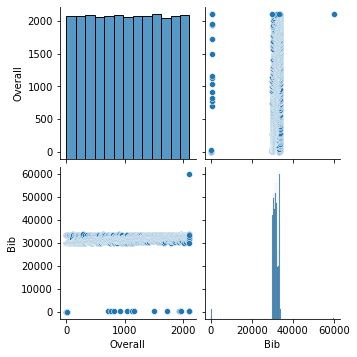

In [164]:
sns.pairplot(final_2018_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='Time'>

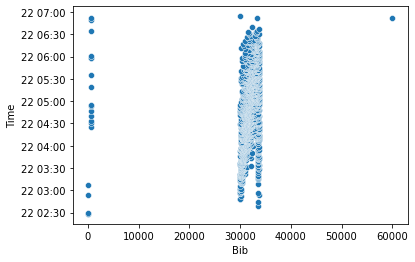

In [165]:
sns.scatterplot("Bib","Time",data=final_2018_half)

In [166]:
final_2018_hallf["Time"] = final_2018_half['Time'].dt.time

NameError: name 'final_2018_hallf' is not defined

In [167]:
final_2018_half['durationFloat'] = final_2018_half['Time'].dt.hour.astype(float)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='Overall'>

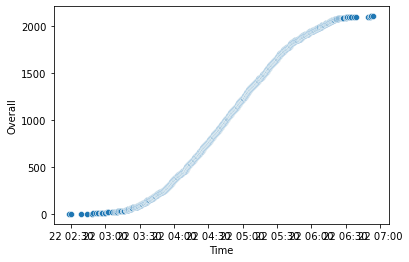

In [168]:
sns.scatterplot("Time","Overall",data=final_2018_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='Bib'>

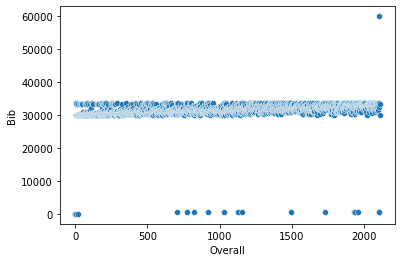

In [169]:
sns.scatterplot("Overall","Bib",data=final_2018_half)

In [170]:
# How many people lie in each bib
final_2018_half.groupby("Bib").count()

,Overall,Name,Time,durationFloat
Bib,,,,
1,1,1,1,1
3,1,1,1,1
10,1,1,1,1
11,1,1,1,1
517,1,1,1,1
...,...,...,...,...
33717,1,1,1,1
33718,1,1,1,1
33719,1,1,1,1


In [171]:
final_2018_half.loc[final_2016_half["Bib"] == 1]

NameError: name 'final_2016_half' is not defined

In [172]:
final_2018_half['Time'].var()

TypeError: cannot perform var with type datetime64[ns]

In [141]:
##2019_Half-Marathon EDA

In [142]:
half_2019 = marathon(urlbase_2019, pgs_2019)
half_2019.shape

(2811, 4)

In [143]:
half_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2811 non-null   int64 
 1   Bib      2811 non-null   int64 
 2   Name     2811 non-null   object
 3   Time     2811 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.0+ KB


In [144]:
half_2019.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09


In [145]:
half_2019["Time"]= pd.to_datetime(half_2019["Time"])

In [146]:
half_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  2811 non-null   int64         
 1   Bib      2811 non-null   int64         
 2   Name     2811 non-null   object        
 3   Time     2811 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 88.0+ KB


In [147]:
slowest = half_2019.loc[half_2019["Time"] == half_2019["Time"].min()]

In [148]:
slowest

,Overall,Bib,Name,Time
2025,99999,50463,Pedro Lopez,2020-11-22
2026,99999,30318,Mahlon Hellman,2020-11-22
2027,99999,30334,Jason Kelly,2020-11-22
2028,99999,32317,Rob Bateman,2020-11-22
2029,99999,32340,Michael Cauley,2020-11-22
...,...,...,...,...
2806,99999,31741,Erica Cruz,2020-11-22
2807,99999,32960,Christine Zavala,2020-11-22
2808,99999,31659,Yaa Asare,2020-11-22
2809,99999,32497,Brian Miller,2020-11-22


In [149]:
final_2019_half = half_2019.drop(slowest.index)

In [150]:
winner = final_2019_half.loc[final_2019_half["Time"]==final_2019_half["Time"].min()]
winner

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,2020-11-22 01:37:54


In [151]:
half_2019["Time"].max()

Timestamp('2020-11-22 06:43:55')

In [152]:
import seaborn as sns

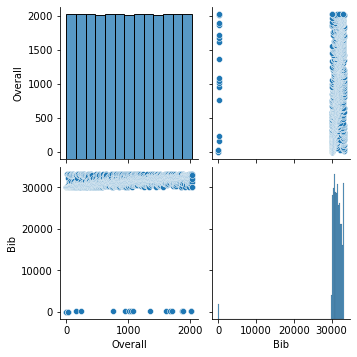

In [153]:
sns.pairplot(final_2019_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='Time'>

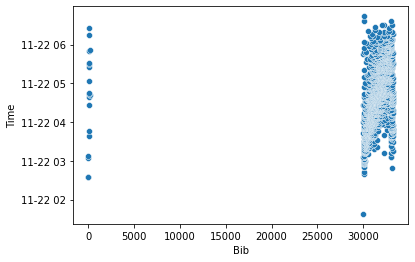

In [154]:
sns.scatterplot("Bib","Time",data=final_2019_half)

In [155]:
final_2019_half["Time"] = final_2019_half['Time'].dt.time

In [156]:
final_2019_half['durationFloat'] = final_2019_half['Time'].dt.hour.astype(float)

AttributeError: Can only use .dt accessor with datetimelike values

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: float() argument must be a string or a number, not 'datetime.time'

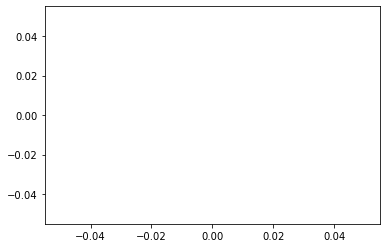

In [157]:
sns.scatterplot("Time","Overall",data=final_2019_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='Bib'>

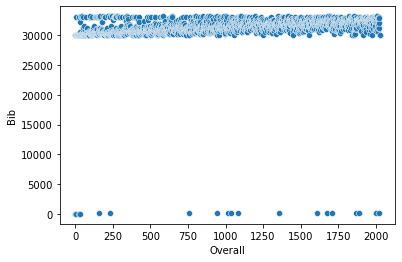

In [158]:
sns.scatterplot("Overall","Bib",data=final_2019_half)

In [159]:
# How many people lie in each bib
final_2019_half.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
2,1,1,1
4,1,1,1
7,1,1,1
101,1,1,1
...,...,...,...
33213,1,1,1
33215,1,1,1
33216,1,1,1


In [160]:
final_2019_half.loc[final_2019_half["Bib"] == 1]

,Overall,Bib,Name,Time
1,2,1,Scott Wietecha,02:34:59


In [161]:
final_2019_half['Time'].var()

TypeError: float() argument must be a string or a number, not 'datetime.time'